# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Made Angga Danan Jaya]
- **Email:** [madeanggaa28@gmail.com]
- **ID Dicoding:** [madeangga]

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari?
- Apakah cuaca memengaruhi jumlah peminjaman sepeda?
- Bagaimana perbedaan jumlah penggunaan sepeda antara hari kerja dan hari libur?
- Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda?
- Bagaimana tren penggunaan sepeda sepanjang tahun?

In [3]:
# prompt: koneksikan dengan google drive

from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Streamlit

Mounted at /content/drive
/content/drive/MyDrive/Streamlit


## Import Semua Packages/Library yang Digunakan

In [4]:
import numpy as np
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats

## Data Wrangling

### Gathering Data

In [60]:
data_directory = "dataset/"
dataframes = pd.read_csv(f"{data_directory}hour.csv")

In [61]:
dataframes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Memeriksa Data

In [53]:
print(dataframes.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None


Apakah ada data yang duplikat?

In [57]:
# Menghitung jumlah total sampel dan jumlah duplikat
duplicate_df = pd.DataFrame({
    'Metric': ['Total Sample Count', 'Duplicate Count'],
    'Count': [dataframes.shape[0], dataframes.duplicated().sum()]
})

# Menampilkan hasil
print(duplicate_df)

               Metric  Count
0  Total Sample Count  17379
1     Duplicate Count      0


Cek Nilai Yang Kemungkinan Hilang

In [58]:
missing_values = dataframes.isnull().sum()
print(f"DataFrames 'Hour':")
print(missing_values, "\n")

DataFrames 'Hour':
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64 



### Cleaning Data

CNT

In [59]:
print(dataframes['cnt'].value_counts())

cnt
5      260
6      236
4      231
3      224
2      208
      ... 
913      1
847      1
777      1
661      1
636      1
Name: count, Length: 869, dtype: int64


In [16]:
print(dataframes['day'].isnull().sum())
print(dataframes['hour'].isnull().sum())

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [75]:
print(f"Jumlah duplikasi day: {dataframes.duplicated().sum()}")
print(f"Jumlah duplikasi hour: {dataframes.duplicated().sum()}")

Jumlah duplikasi day: 0
Jumlah duplikasi hour: 0


## Exploratory Data Analysis (EDA)

### Explore MONTH

In [65]:
dataframes['mnth']=dataframes['mnth'].astype('int')

In [66]:
dataframes[['instant', 'dteday', 'cnt']].sample(5)

,instant,dteday,cnt
12676,12677,2012-06-17,274
546,547,2011-01-24,35
5503,5504,2011-08-22,24
5746,5747,2011-09-01,177
5737,5738,2011-09-01,229


In [76]:
dataframes.groupby('mnth')['cnt'].sum().sort_index(ascending=True)

,cnt
mnth,
1,134933
2,151352
3,228920
4,269094
5,331686
6,346342
7,344948
8,351194
9,345991


### Explore Data


In [77]:
columns_to_explore = [
    'season', 'yr', 'mnth', 'hr', 'holiday',
    'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum',
    'windspeed', 'casual', 'registered', 'cnt'
]

# Fungsi untuk mengeksplorasi dataset berdasarkan kolom
def explore_column(column):
    if column in ['instant', 'dteday']:  # Tidak relevan untuk groupby
        print(f"\nKolom '{column}': Tidak relevan untuk eksplorasi dengan groupby.")
        print(dataframes[column].head())  # Tampilkan 5 sampel pertama
    elif column in ['cnt', 'casual', 'registered', 'temp', 'atemp', 'hum', 'windspeed']:
        # Mengelompokkan data berdasarkan kolom tersebut dan menghitung total cnt
        print(f"\nEksplorasi Kolom '{column}':")
        grouped_data = (
            dataframes.groupby(column)['cnt']
            .sum()
            .sort_values(ascending=True)
        )
        print(grouped_data)
    else:
        # Mengelompokkan data berdasarkan kolom tersebut dan menghitung jumlah baris
        print(f"\nEksplorasi Kolom '{column}':")
        grouped_data = (
            dataframes.groupby(column)
            .size()
            .sort_values(ascending=True)
        )
        print(grouped_data)

# Looping untuk mengeksplorasi setiap kolom
for col in columns_to_explore:
    explore_column(col)


Eksplorasi Kolom 'season':
season
4    4232
1    4242
2    4409
3    4496
dtype: int64

Eksplorasi Kolom 'yr':
yr
0    8645
1    8734
dtype: int64

Eksplorasi Kolom 'mnth':
mnth
2     1341
1     1429
4     1437
9     1437
11    1437
6     1440
10    1451
3     1473
8     1475
12    1483
5     1488
7     1488
dtype: int64

Eksplorasi Kolom 'hr':
hr
3     697
4     697
2     715
5     717
1     724
6     725
0     726
10    727
9     727
11    727
7     727
8     727
22    728
12    728
18    728
19    728
20    728
21    728
23    728
13    729
14    729
15    729
16    730
17    730
dtype: int64

Eksplorasi Kolom 'holiday':
holiday
1      500
0    16879
dtype: int64

Eksplorasi Kolom 'weekday':
weekday
2    2453
4    2471
3    2475
1    2479
5    2487
0    2502
6    2512
dtype: int64

Eksplorasi Kolom 'workingday':
workingday
0     5514
1    11865
dtype: int64

Eksplorasi Kolom 'weathersit':
weathersit
4        3
3     1419
2     4544
1    11413
dtype: int64

Eksplorasi Kolom 'temp':


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari?

Pola Penggunaan Sepeda Berdasarkan Jam:
hr
0      53.898072
1      33.375691
2      22.869930
3      11.727403
4       6.352941
5      19.889819
6      76.044138
7     212.064649
8     359.011004
9     219.309491
10    173.668501
11    208.143054
12    253.315934
13    253.661180
14    240.949246
15    251.233196
16    311.983562
17    461.452055
18    425.510989
19    311.523352
20    226.030220
21    172.314560
22    131.335165
23     87.831044
Name: cnt, dtype: float64


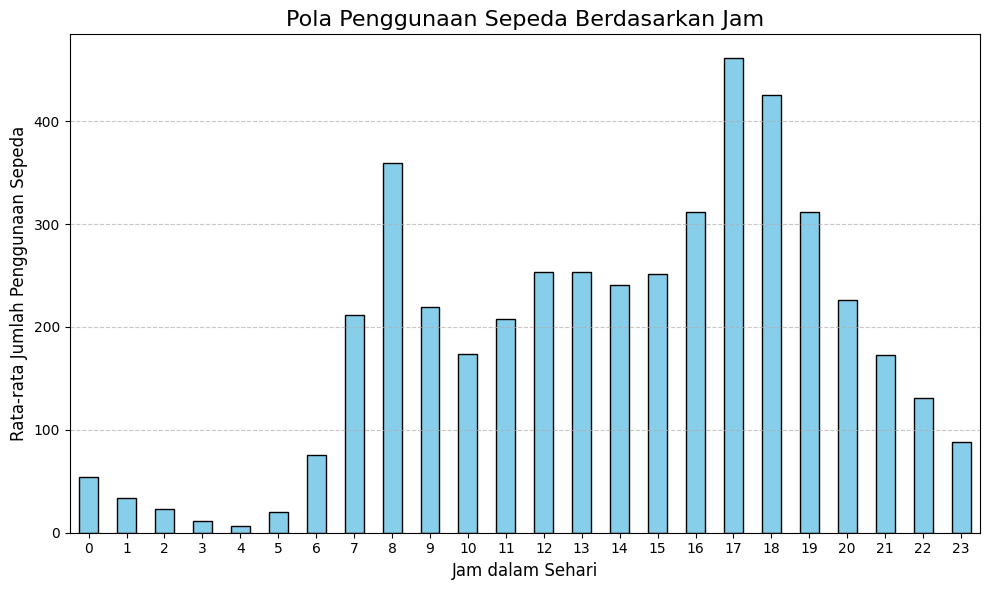

In [69]:
# Mengelompokkan data berdasarkan jam (hr) dan menghitung rata-rata jumlah penggunaan sepeda (cnt)
hourly_pattern = dataframes.groupby('hr')['cnt'].mean()

# Menampilkan pola penggunaan sepeda berdasarkan jam
print("Pola Penggunaan Sepeda Berdasarkan Jam:")
print(hourly_pattern)

# Visualisasi pola penggunaan sepeda berdasarkan jam
plt.figure(figsize=(10, 6))
hourly_pattern.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Pola Penggunaan Sepeda Berdasarkan Jam", fontsize=16)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Rata-rata Jumlah Penggunaan Sepeda", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Pola penggunaan sepeda berdasarkan jam menunjukkan puncak penggunaan sekitar jam 7 pagi dan 5 sore, saat orang pergi bekerja atau bersekolah. Pada jam-jam awal (0-5), penggunaan sangat rendah, dengan penurunan setelah jam 8 pagi. Terdapat sedikit peningkatan saat jam makan siang, tetapi penggunaan mulai menurun drastis setelah jam 19. Ini mencerminkan kebiasaan bersepeda yang dipengaruhi oleh rutinitas harian dan kondisi cahaya.

### Pertanyaan 2: Apakah cuaca memengaruhi jumlah peminjaman sepeda?

Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda:
weathersit
1    204.869272
2    175.165493
3    111.579281
4     74.333333
Name: cnt, dtype: float64


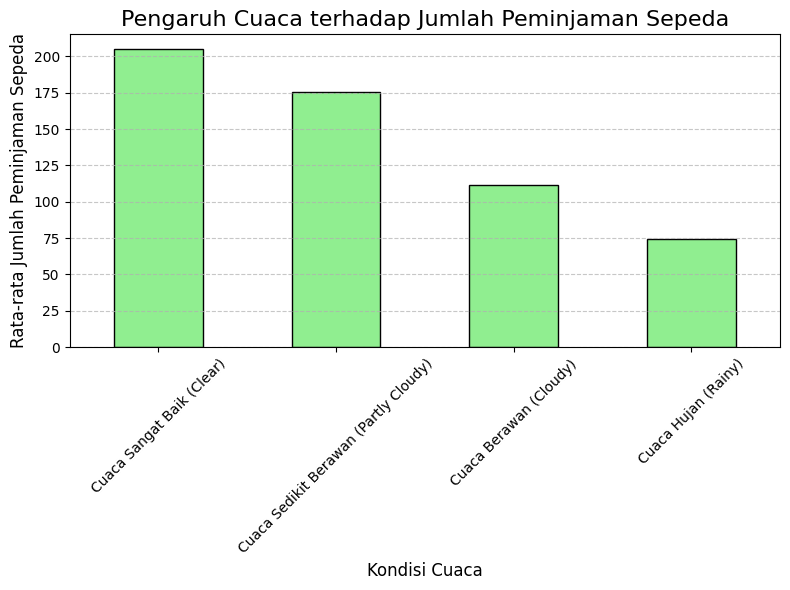

In [71]:
# Mengelompokkan data berdasarkan kondisi cuaca ('weathersit') dan menghitung rata-rata jumlah penggunaan sepeda ('cnt')
weather_impact = dataframes.groupby('weathersit')['cnt'].mean()

# Menampilkan pengaruh cuaca terhadap jumlah peminjaman sepeda
print("Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda:")
print(weather_impact)

# Membuat keterangan untuk kondisi cuaca
weather_labels = {
    1: 'Cuaca Sangat Baik (Clear)',
    2: 'Cuaca Sedikit Berawan (Partly Cloudy)',
    3: 'Cuaca Berawan (Cloudy)',
    4: 'Cuaca Hujan (Rainy)'
}

# Visualisasi pengaruh cuaca terhadap jumlah peminjaman sepeda
plt.figure(figsize=(8, 6))
weather_impact.plot(kind='bar', color='lightgreen', edgecolor='black')

# Menambahkan judul, sumbu x, dan sumbu y
plt.title("Pengaruh Cuaca terhadap Jumlah Peminjaman Sepeda", fontsize=16)
plt.xlabel("Kondisi Cuaca", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda", fontsize=12)

# Menambahkan keterangan cuaca di sumbu x
plt.xticks(ticks=range(len(weather_impact)), labels=[weather_labels[i] for i in weather_impact.index], rotation=45)

# Menambahkan grid pada sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

Cuaca memengaruhi jumlah peminjaman sepeda secara signifikan. Peminjaman tertinggi terjadi saat cuaca sangat baik (clear) dan sedikit berawan (partly cloudy), sementara saat hujan, jumlah peminjaman turun drastis. Ini menunjukkan orang lebih cenderung bersepeda pada cuaca baik.


# Pertanyaan 3: - Bagaimana perbedaan jumlah penggunaan sepeda antara hari kerja dan hari libur?

Perbedaan Jumlah Penggunaan Sepeda antara Hari Kerja dan Hari Libur:
workingday
0    1000269
1    2292410
Name: cnt, dtype: int64


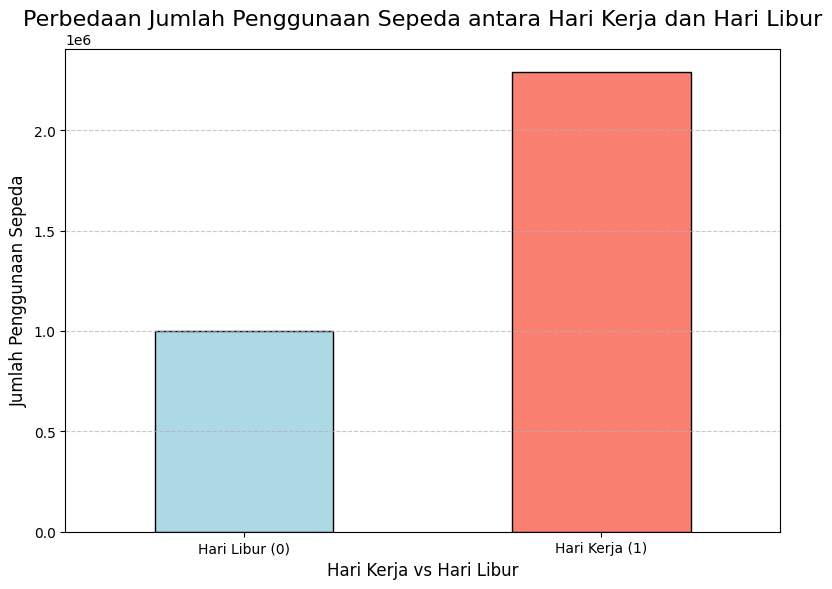

In [72]:
# Mengelompokkan data berdasarkan apakah hari kerja atau hari libur ('workingday') dan menghitung jumlah peminjaman sepeda ('cnt')
workingday_impact = dataframes.groupby('workingday')['cnt'].sum()

# Menampilkan perbedaan jumlah penggunaan sepeda antara hari kerja dan hari libur
print("Perbedaan Jumlah Penggunaan Sepeda antara Hari Kerja dan Hari Libur:")
print(workingday_impact)

# Visualisasi perbedaan jumlah penggunaan sepeda antara hari kerja dan hari libur
plt.figure(figsize=(8, 6))
workingday_impact.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')

# Menambahkan judul, sumbu x, dan sumbu y
plt.title("Perbedaan Jumlah Penggunaan Sepeda antara Hari Kerja dan Hari Libur", fontsize=16)
plt.xlabel("Hari Kerja vs Hari Libur", fontsize=12)
plt.ylabel("Jumlah Penggunaan Sepeda", fontsize=12)

# Menambahkan label sumbu x dengan keterangan
plt.xticks(ticks=[0, 1], labels=['Hari Libur (0)', 'Hari Kerja (1)'], rotation=0)

# Menambahkan grid pada sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

Pada hari kerja, penggunaan sepeda jauh lebih tinggi dibandingkan pada hari libur. Hal ini mencerminkan kebutuhan untuk berangkat kerja atau sekolah yang lebih mendominasi aktivitas bersepeda.


# Pertanyaan 4: Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda?

Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda:
temp
0.02     41.882353
0.04     35.625000
0.06     42.000000
0.08     28.235294
0.10     49.294118
0.12     58.421053
0.14     55.108696
0.16     65.578261
0.18     60.116129
0.20     79.745763
0.22     69.914489
0.24     80.159004
0.26     87.960644
0.28    106.750831
0.30    115.917317
0.32    134.230769
0.34    135.308527
0.36    147.842027
0.38    164.212366
0.40    167.441368
0.42    175.341241
0.44    158.907298
0.46    162.906977
0.48    190.434028
0.50    198.429379
0.52    202.967626
0.54    200.284710
0.56    213.740933
0.58    222.065574
0.60    222.081481
0.62    204.111570
0.64    223.966763
0.66    225.402597
0.68    209.538682
0.70    256.953623
0.72    286.752632
0.74    313.153101
0.76    342.575758
0.78    313.195266
0.80    347.375385
0.82    339.690141
0.84    325.818841
0.86    322.954198
0.88    363.660377
0.90    309.288889
0.92    320.020408
0.94    217.058824
0.96    274.500000
0.98    539.000000
1.00    294.000

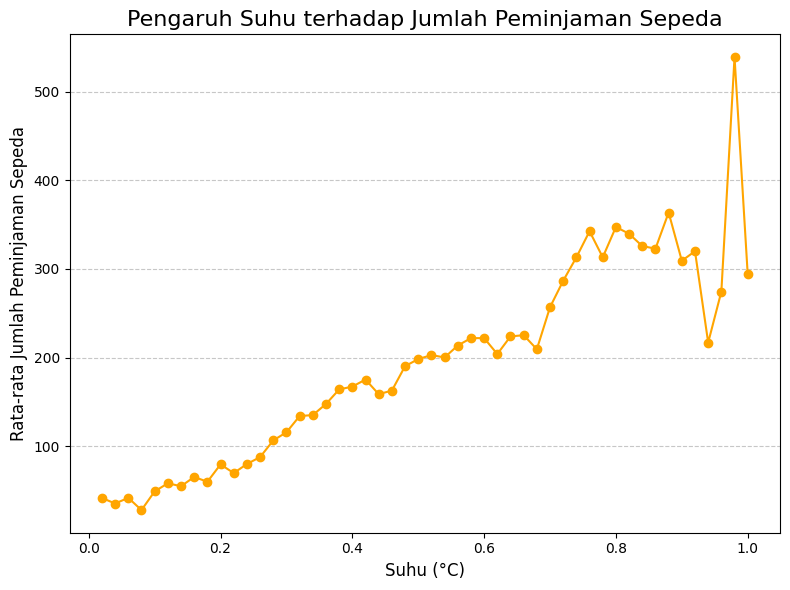

In [73]:
# Mengelompokkan data berdasarkan suhu ('temp') dan menghitung rata-rata jumlah peminjaman sepeda ('cnt')
temp_impact = dataframes.groupby('temp')['cnt'].mean()

# Menampilkan pengaruh suhu terhadap jumlah peminjaman sepeda
print("Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda:")
print(temp_impact)

# Visualisasi pengaruh suhu terhadap jumlah peminjaman sepeda
plt.figure(figsize=(8, 6))
temp_impact.plot(kind='line', marker='o', color='orange')

# Menambahkan judul, sumbu x, dan sumbu y
plt.title("Pengaruh Suhu terhadap Jumlah Peminjaman Sepeda", fontsize=16)
plt.xlabel("Suhu (°C)", fontsize=12)
plt.ylabel("Rata-rata Jumlah Peminjaman Sepeda", fontsize=12)

# Menambahkan grid pada sumbu y
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

Suhu berpengaruh positif terhadap peminjaman sepeda; jumlah peminjaman meningkat seiring dengan naiknya suhu. Orang cenderung lebih banyak bersepeda saat cuaca hangat.


## Pertanyaan 5 : Bagaimana tren penggunaan sepeda sepanjang tahun?

Tren Penggunaan Sepeda Sepanjang Tahun:
yr         0       1
mnth                
1      38189   96744
2      48215  103137
3      64045  164875
4      94870  174224
5     135821  195865
6     143512  202830
7     141341  203607
8     136691  214503
9     127418  218573
10    123511  198841
11    102167  152664
12     87323  123713


<Figure size 1000x600 with 0 Axes>

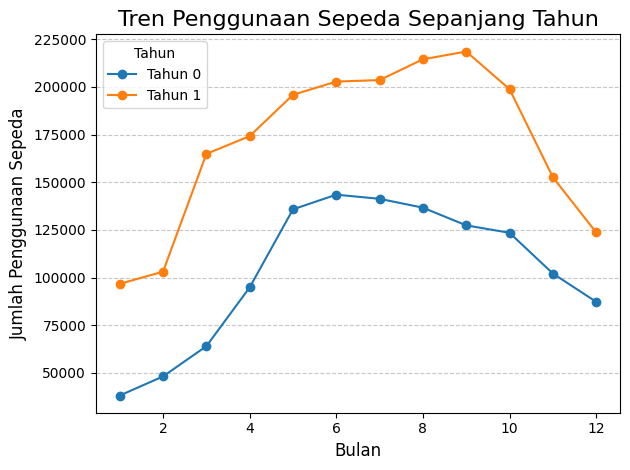

In [74]:
# Mengelompokkan data berdasarkan tahun ('yr') dan bulan ('mnth') untuk menghitung jumlah peminjaman sepeda ('cnt')
yearly_monthly_trend = dataframes.groupby(['yr', 'mnth'])['cnt'].sum().unstack(level=0)

# Menampilkan tren penggunaan sepeda sepanjang tahun
print("Tren Penggunaan Sepeda Sepanjang Tahun:")
print(yearly_monthly_trend)

# Visualisasi tren penggunaan sepeda sepanjang tahun
plt.figure(figsize=(10, 6))

# Plot tren dengan tahun sebagai legenda
yearly_monthly_trend.plot(kind='line', marker='o')

# Menambahkan judul, sumbu x, dan sumbu y
plt.title("Tren Penggunaan Sepeda Sepanjang Tahun", fontsize=16)
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Penggunaan Sepeda", fontsize=12)

# Menambahkan keterangan untuk tahun
plt.legend(title="Tahun", labels=[f"Tahun {int(year)}" for year in yearly_monthly_trend.columns])

# Menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Menampilkan plot
plt.show()

Tren penggunaan sepeda menunjukkan peningkatan signifikan pada pertengahan tahun, dengan puncak penggunaan di bulan 5 atau 6. Tahun 1 menunjukkan tingkat penggunaan lebih tinggi dibandingkan Tahun 0, tetapi keduanya menurun menjelang akhir tahun.


## Conclusion

- Bagaimana pola penggunaan sepeda berdasarkan jam dalam sehari?
- Apakah cuaca memengaruhi jumlah peminjaman sepeda?
- Bagaimana perbedaan jumlah penggunaan sepeda antara hari kerja dan hari libur?
- Bagaimana pengaruh suhu terhadap jumlah peminjaman sepeda?
- Bagaimana tren penggunaan sepeda sepanjang tahun?

Pola penggunaan sepeda berdasarkan jam dalam sehari menunjukkan bahwa penggunaan sepeda mencapai puncaknya sekitar jam 7 pagi dan 5 sore, menunjukkan aktivitas bersepeda yang lebih tinggi saat orang berangkat kerja atau sekolah. Pada jam-jam awal (0-5), penggunaan sepeda sangat rendah, mencerminkan bahwa sebagian besar orang tidak bersepeda di malam hingga pagi dini hari. setelah jam 8 pagi, terjadi penurunan, dengan sedikit peningkatan saat jam makan siang (12-14), sebelum kembali meningkat di sore hari. Namun, setelah jam 19, penggunaan sepeda menurun drastis, menunjukkan bahwa aktivitas bersepeda berkurang pada malam hari. Pola ini mencerminkan kebiasaan bersepeda yang terpengaruh oleh rutinitas harian dan faktor-faktor seperti cuaca serta ketersediaan cahaya.


cuaca sangat memengaruhi jumlah peminjaman sepeda. Dari grafik tersebut, terlihat bahwa jumlah peminjaman tertinggi terjadi pada kondisi cuaca sangat baik (clear) dan sedikit berawan (partly cloudy), dengan rata-rata lebih dari 200 peminjaman. Sebaliknya, saat cuaca hujan, jumlah peminjaman turun drastis. Ini menunjukkan bahwa orang cenderung lebih banyak bersepeda pada cuaca yang baik dan menghindari bersepeda saat kondisi cuaca buruk.

Perbedaan jumlah penggunaan sepeda antara hari kerja dan hari libur sangat mencolok. Pada hari kerja, jumlah penggunaan sepeda mencapai lebih dari 2 juta, sedangkan pada hari libur hanya sekitar 1 juta. Ini menunjukkan bahwa penggunaan sepeda jauh lebih tinggi pada hari kerja dibandingkan hari libur, yang mungkin disebabkan oleh kebutuhan untuk berangkat kerja atau sekolah.


Suhu berpengaruh signifikan terhadap jumlah peminjaman sepeda. Secara umum, seiring meningkatnya suhu, jumlah peminjaman cenderung meningkat. Pada suhu yang lebih rendah, jumlah peminjaman relatif rendah, sementara pada suhu yang lebih hangat, peminjaman mengalami kenaikan yang jelas. Ini menunjukkan bahwa orang lebih cenderung bersepeda saat cuaca lebih hangat.


Tren penggunaan sepeda sepanjang tahun menunjukkan fluktuasi yang signifikan. Pada **Tahun 0**, penggunaan sepeda meningkat secara bertahap mencapai puncaknya pada bulan 6, kemudian mengalami penurunan. Sementara pada **Tahun 1**, penggunaan sepeda juga meningkat dengan lebih tajam, mencapai puncaknya di bulan 5, dan menunjukkan tren yang lebih tinggi dibandingkan Tahun 0. Secara keseluruhan, penggunaan sepeda cenderung lebih tinggi pada pertengahan tahun dan menurun menjelang akhir tahun.
